## <u> Dispersion Extraction Using FFT Method </u>

## Script information:
- This file is supposed to provide the best method of extracting the difference in spectral phase and then the GVD from OSA traces
- Provide data files from the OSA as csv's
- They will be converted to $\omega$, interpolated and the FFT procedure applied

In [1]:
# ********* Import modules ********* #
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import csv
import pandas as pd
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
add_to_path = os.path.join(parent_directory, "Modules/Refractive_Indices")
os.listdir(parent_directory)
print(add_to_path)
sys.path.append(add_to_path)
import RefractiveIndexClass
from Functions import DispersionExtraction as de


/Users/jackmorse/Documents/University/Year 4/FYP/Modules/Refractive_Indices


-0.0142


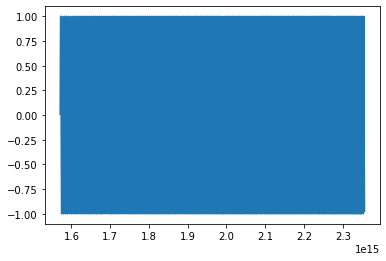

In [2]:
# Generate data:
import numpy as np
wavelengths = np.linspace(800, 1200, 10000)
omegas = 2 * np.pi * 3e17 / np.array(wavelengths)
omegas = np.linspace(max(omegas), min(omegas), len(wavelengths))
L_f = 0.01
DeltaL_air = - L_f * RefractiveIndexClass.RefractiveIndex.n_group(RefractiveIndexClass.RefractiveIndex.n_fs, 500) 
DeltaL_air = - 0.0142
print(DeltaL_air)
n_f = RefractiveIndexClass.RefractiveIndex.n_fs(wavelengths)
phase = (omegas / 3e8) * (DeltaL_air + L_f * n_f)
plt.plot(omegas, np.cos(phase))
cos_phi = np.cos(phase) + 1
omegas2 = omegas

##### Read OSA data (in wavelengths) from a CSV

All OSA traces


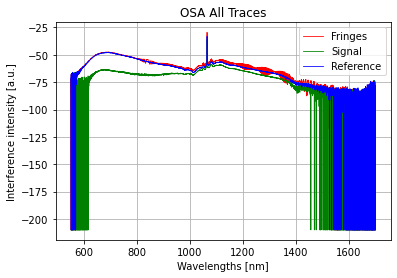

OSA Spectrum Full: 


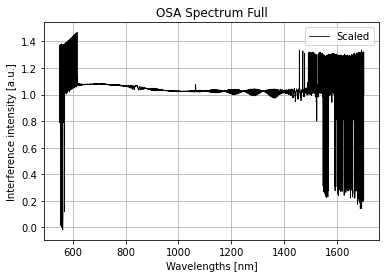

OSA Spectrum: 


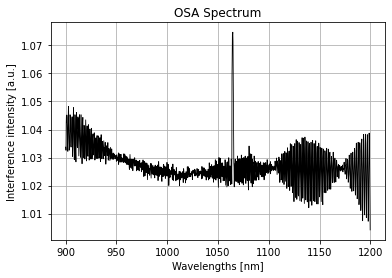

OSA Spectrum in Omega after Linear Interpolation: 


Text(0, 0.5, 'Interference intensity [a.u.]')

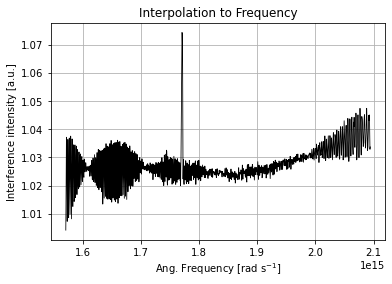

In [3]:
# Provide data:
data_set = "b6"
interference_data_path =  "/Users/jackmorse/Documents/University/Year 4/FYP/Physics-FYP/Data Files/21-Nov-2023-data/no-poi-spectral-interference-550-1700nm-1.CSV" # "/Users/jackmorse/Documents/University/Year 4/FYP/Physics-FYP/Sample-Data-1/" + data_set + "_fringes.csv"
reference_data_path = "/Users/jackmorse/Documents/University/Year 4/FYP/Physics-FYP/Data Files/21-Nov-2023-data/no-poi-reference-arm-550-1700nm-1.CSV" # "/Users/jackmorse/Documents/University/Year 4/FYP/Physics-FYP/Sample-Data-1/" + data_set + "_ref.csv"
fibre_data_path = "/Users/jackmorse/Documents/University/Year 4/FYP/Physics-FYP/Data Files/21-Nov-2023-data/no-poi-fibre-arm-550-1700nm-1.CSV" # "/Users/jackmorse/Documents/University/Year 4/FYP/Physics-FYP/Sample-Data-1/" + data_set + "_signal.csv"
min_wavelength = 900
max_wavelength = 1200
c = 3e17                                                        # SOL in nm / s
skiprows = 40
xlim = None

# Interference, reference and fibre read in:
data = pd.read_csv(interference_data_path, header=None, skiprows=skiprows)
fringes_x = data[0]
fringes_y = data[1]

if reference_data_path != "":
    data = pd.read_csv(reference_data_path, header=None, skiprows=skiprows)
    ref_x = data[0]
    ref_y = data[1]

if fibre_data_path != "":
    data = pd.read_csv(fibre_data_path, header=None, skiprows=skiprows)
    signal_x = data[0]
    signal_y = data[1]

# Restrict and divide by reference and fibre arms
idx = np.where((fringes_x > min_wavelength) & (fringes_x < max_wavelength))[0]
wavelengths = fringes_x[idx]
if (reference_data_path != "" and fibre_data_path != ""):
    show_all_traces = True 
    if show_all_traces:
        print("All OSA traces")
        plt.plot(fringes_x, fringes_y, color = 'r', linewidth = 0.8, label = "Fringes")
        plt.plot(signal_x, signal_y, color = 'g', linewidth = 0.8, label = "Signal")
        plt.plot(ref_x, ref_y, color = 'b', linewidth = 0.8, label = "Reference")
        plt.grid()
        plt.legend()
        plt.title("OSA All Traces")
        plt.xlabel("Wavelengths [nm]")
        plt.ylabel("Interference intensity [a.u.]")
        if xlim is not None:
            plt.xlim(xlim)
        plt.show()
    correlation_product_intensity = ((fringes_y - ref_y - signal_y) + np.sqrt(ref_y * signal_y)) /(2 * np.sqrt(ref_y * signal_y))
    print("OSA Spectrum Full: ")
    plt.plot(fringes_x, correlation_product_intensity, color = 'k', linewidth = 0.8, label = "Scaled")       
    plt.grid()
    plt.title("OSA Spectrum Full")
    plt.xlabel("Wavelengths [nm]")
    plt.ylabel("Interference intensity [a.u.]")
    plt.legend()
    if xlim is not None:
            plt.xlim(xlim)
    plt.show()
    intensity = correlation_product_intensity[idx]
else:
    intensity = fringes_y[idx]
    print("OSA Spectrum Full: ")
    plt.plot(fringes_x, fringes_y, color = 'k', linewidth = 0.8)
    plt.grid()
    plt.title("OSA Spectrum Full")
    plt.xlabel("Wavelengths [nm]")
    plt.ylabel("Interference intensity [a.u.]")
    plt.show()


print("OSA Spectrum: ")
plt.plot(wavelengths, intensity, color = 'k', linewidth = 0.8)
plt.grid()
plt.title("OSA Spectrum")
plt.xlabel("Wavelengths [nm]")
plt.ylabel("Interference intensity [a.u.]")
plt.show()

# Convert from wavelengths to frequency for ease of the FT, using linear interpolation:
def linear_interpolation_omega_wavelength(x, y):
    from scipy import interpolate
    x = 2 * np.pi * c / x                                           # Frequency in rad/s
    x_grid = np.linspace(min(x), max(x), len(y))                    # Adjust the number of points as needed        
    linear_interp = interpolate.interp1d(x, y, kind='linear')       # Perform linear interpolation
    y_interp = linear_interp(x_grid)
    return x_grid, y_interp

omegas, interference_intensity_omega = linear_interpolation_omega_wavelength(wavelengths, intensity)
x = omegas
y = interference_intensity_omega
print("OSA Spectrum in Omega after Linear Interpolation: ")
plt.plot(omegas, interference_intensity_omega, color = 'k', linewidth = 0.8)
plt.grid()
plt.title("Interpolation to Frequency")
plt.xlabel(r"Ang. Frequency [rad s$^{-1}$]")
plt.ylabel("Interference intensity [a.u.]")

#### Scaling the interference using other traces if provided:

In [4]:
# NEEDS WORK, NEED TO INTERPOLATE OTHER DATA TOO
if not (reference_data_path == "" or fibre_data_path == ""):
    pass
    # Scale the interference by dividing by the others in the normal way

##### FFT the data:

1499
1499
1499
1499


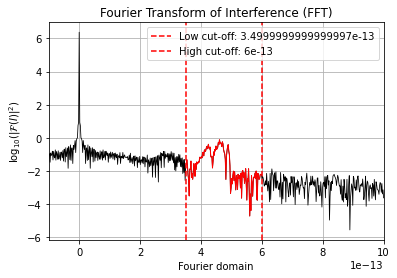

In [5]:
xscale = 1e-12
keep_min_freq =  0.35 * xscale
keep_max_freq = 0.6 * xscale
xlim = [-0.1 * xscale, 1 * xscale]
ylim = None


# zero_filling_factor = 2
# N = len(x)                      # Number of data points
# T = (max(x) - min(x)) / N       # Sample spacing
# xf = np.fft.fftfreq(N, T)       # Create the Fourier domain
# xf = np.fft.fftshift(xf)        # Shift the domain to be centered around 0

# # Perform the FFT
# yf = np.fft.fft(y)
# yf = np.fft.fftshift(yf)

# padded_array = np.zeros(zero_filling_factor * N)
# padded_array[:len(yf)] = yf
# yf = padded_array

# inverse_ys = de.InverseFFT(yf)
# plt.plot(inverse_ys, linewidth = 0.5)


# np.fft.fft



# Pad the x and the y
# x = omegas2
# y = cos_phi



# zero_filling_factor = 2
# y_pad = np.zeros(zero_filling_factor * len(y))
# y_pad[:len(y)] = y
# y = y_pad

# min_x = min(x)
# max_x = max(x)
# step_size = x[1]- x[0]
# x = np.linspace(min_x, zero_filling_factor * max_x, zero_filling_factor * len(x))
print(len(x))
print(len(y))
[xf, yf] = de.TraceFFT(x, y, normalise=False, hanning=False) # de.TraceFFT(x = x, y = y, normalise = False, hanning = False)
print(len(yf))
print(len(xf))
plt.plot(xf, np.log10(np.abs(yf)**2), color = 'k', linewidth = 0.8)
plt.axvline(keep_min_freq, color = 'red', linestyle = '--', label= f"Low cut-off: {keep_min_freq}")
if keep_max_freq is not None:
    plt.axvline(keep_max_freq, color = 'red', linestyle = '--', label= f"High cut-off: {keep_max_freq}")
idx = de.FilterIndicesFFT(xf, np.abs(yf), "right", keep_min_freq, keep_max_freq)
filtered_fourier_data = de.BoxFilter(yf, idx)
plt.plot(xf[idx], np.log10(np.abs(filtered_fourier_data[idx])**2), color='red', linewidth = 1)
plt.grid()
plt.legend()
plt.title("Fourier Transform of Interference (FFT)")
plt.xlabel("Fourier domain")
plt.ylabel(r'$\log_{10}(|\mathcal{F}(I)|^2)$')
# plt.ylim([5,6])
if xlim is not None:
    plt.xlim(xlim)
if ylim is not None:
    plt.ylim(ylim)
plt.show()

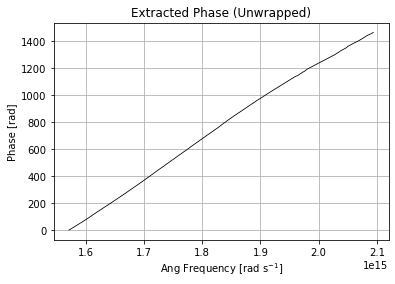

In [6]:
filtered_y = de.InverseFFT(filtered_fourier_data)
final_ys = de.ExtractAndUnwrap(filtered_y)
plt.plot(x, final_ys, color = 'k', linewidth = 0.8)
plt.title("Extracted Phase (Unwrapped)")
plt.ylabel("Phase [rad]")
plt.xlabel(r"Ang Frequency [rad s$^{-1}$]")
plt.grid()
plt.show()

#### Convert back to wavelength from omega:

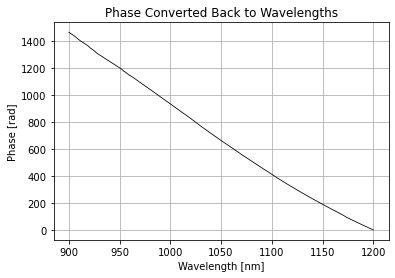

In [7]:
wavelengths, phase = linear_interpolation_omega_wavelength(x, final_ys)
plt.plot(wavelengths, phase, color = 'k', linewidth = 0.8)
plt.title("Phase Converted Back to Wavelengths")
plt.ylabel("Phase [rad]")
plt.xlabel(r"Wavelength [nm]")
plt.grid()
plt.show()

#### Obtain $\beta$ from the phase

Text(0, 0.5, '$\\beta(\\lambda)$ [rad]')

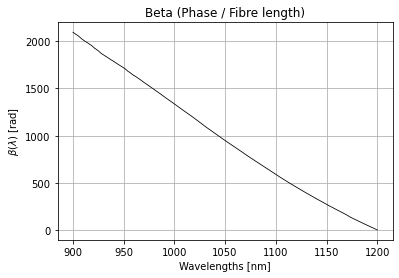

In [8]:
fibre_length = 0.7 
beta_lambda = de.ObtainBetaFromPhi(phase, fibre_length)
plt.plot(wavelengths, beta_lambda, color='k', linewidth = 0.8)
plt.grid()
plt.title("Beta (Phase / Fibre length)")
plt.xlabel("Wavelengths [nm]")
plt.ylabel(r'$\beta(\lambda)$ [rad]')
# plt.xlim([800, 825])
# plt.ylim([0, 150])

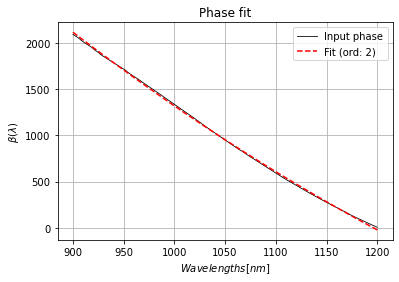

[-2.16926349e+00 -1.89990223e-03 -1.90013404e-03 ... -8.37607079e-04
 -8.35581326e-04 -8.33553267e-04]


Text(0.5, 0, 'Wavelength [nm]')

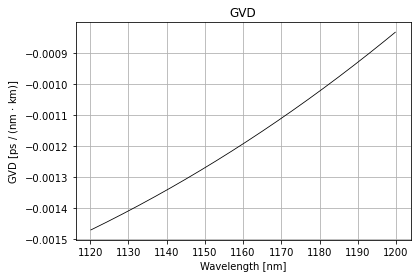

In [9]:
GVD_lambda = de.GVD_lambda(beta_lambda, wavelengths, method = "fit", order = 4, show_plots = True)
idx = np.where(wavelengths > 1120)[0]
plt.plot(wavelengths[idx], GVD_lambda[idx], color = 'k', linewidth = 0.8)
plt.grid()
print(GVD_lambda)
plt.title("GVD")
plt.ylabel(r"GVD [ps / (nm $\cdot$ km)]")
plt.xlabel("Wavelength [nm]")
# plt.xlim([1120, 1170])

In [10]:



plt.plot(xf[idx], np.log10(np.abs(filtered_fourier_data[idx])), color='red', linewidth = linewidth)
plt.legend()
mplcursors.cursor(hover=True)
plt.show()
YN = input("Do you wish to change the FFT cut-off? (Y/N): ")
while True:
    if YN.lower() in ['y', 'yes']:
        try:
            print(f"Current cut-off value: left {settings['keep_min_freq']}, right {settings['keep_max_freq']}")
            new_cutoff = get_valid_input("Enter the new cut-off: ", 0, max(xf))
            update_JSON("keep_min_freq", new_cutoff, settings_file)
            settings = read_settings(settings_file)
            print(f"New cut-off value: left {settings['keep_min_freq']}, right {settings['keep_max_freq']}")
            plt.close()
            idx = de.FilterIndicesFFT(xf, yf, settings["side"], settings["keep_min_freq"], settings["keep_max_freq"])
            filtered_fourier_data = de.BoxFilter(yf, idx)
            plt.close()
            plt.ion()
            plt.plot(xf, np.log10(np.abs(yf)), linewidth = linewidth)
            plt.title("FFT")
            plt.xlabel("Fourier domain")
            plt.ylabel(r'$\log_{10}|\mathcal{F}(I)|$')
            plt.axvline(settings["keep_min_freq"], color = 'red', linestyle = '--', label=f"x = {settings['keep_min_freq']}")
            plt.plot(xf[idx], np.log10(np.abs(filtered_fourier_data[idx])), color='red', linewidth = linewidth)
            plt.legend()
            YN = input("Do you wish to re-adjust? (Y/N): ")
            if YN.lower() in ['y', 'yes']:
                continue
            elif YN.lower() in  ['n', 'no']:
                break
            else:
                display_text("Unrecognised input. Allowing re-adjustment: ", color='red')
                continue
        except Exception as e:
            display_text(f"An unexpected error occured: {e}", color='red')
        break
    elif YN.lower() in ['n', 'no']:
        plt.close()
        break
    else:
        display_text("Unrecognised input, please enter 'y' or 'n'.", color='red')
# plt.close()
# plt.ion()
# plt.plot(xf, np.log10(np.abs(yf)), linewidth = linewidth)
# plt.title("FFT")
# plt.xlabel("Fourier domain")
# plt.ylabel(r'$\log_{10}|\mathcal{F}(I)|$')
# # plt.axvline(settings["keep_min_freq"], color = 'red', linestyle = '--')
# plt.plot(xf[idx], np.log10(np.abs(filtered_fourier_data[idx])), color='red', linewidth = linewidth)
# input("Press any key to close the figure ...")
plt.savefig(os.path.join(save_outputs_path, "FFT.png"), dpi = 1000)
display_text("FFT saved", 'green')




display_text("Unwrap plotted ...", color='blue')
plt.close()
plt.ion()
plt.plot(reference_wavelengths, final_ys, color='green', linewidth=linewidth)
plt.xlabel("Wavelengths [nm]")
plt.ylabel("Phase [rad]")
plt.title("Unwrapped Phase")
input("Press any key to close the figure ...")
plt.savefig(os.path.join(save_outputs_path, "Unwrap.png"), dpi = 1000)
display_text("Unwrap saved", 'green')

while True:
        smooth_over = input("Enter the number of points to smooth over: ")
        try:
            smooth_over = int(smooth_over)
            beta_lambda_smooth = rolling_average(beta_lambda, smooth_over)
            plt.plot(reference_wavelengths, beta_lambda_smooth, label=f"smooth_over = {smooth_over}")
            plt.legend()
            YN = input("Is this smooth enough? (Y/N): ")
            if YN.lower() in ['y', 'yes']:
                break
            elif YN.lower() in ['n', 'no']:
                continue
            else:
                display_text("Invalid input. Taken as 'n'")
                continue
            break
        except ValueError:
            display_text("Invalid input. Please enter an integer value.", color='red')
plt.show()
input("Press any key to close the figure ...")
plt.savefig(os.path.join(save_outputs_path, "beta.png"), dpi = 1000)
display_text("Beta saved", color='green')
# print("CDA")
# plt.close()
# plt.ion()
# plt.plot(reference_wavelengths, de.CDA2(rolling_average(beta_lambda, 10), reference_wavelengths[1] - reference_wavelengths[0]))
# plt.show()
# plt.savefig(os.path.join(save_outputs_path, "smoothed_CDA1.png"), dpi = 1000)
# display_text("CDA figure saved", color='green')
# input("Press any key to close the figure ...")

refractive_index_lambda = de.ObtainRefractiveIndex(beta_lambda, reference_wavelengths)
GVD_lambda = de.GVD_lambda(beta_lambda_smooth, reference_wavelengths)
plt.close()
plt.ion()
display_text("GVD plotted ...", color='blue')
plt.plot(reference_wavelengths, GVD_lambda)
GVD_lambda_smooth = rolling_average(GVD_lambda, smooth_over)
plt.plot(reference_wavelengths, GVD_lambda_smooth, label = f"Smoothed GVD ({smooth_over})")
plt.title("Group Velocity Dispersion")
plt.xlabel("Wavelengths [nm]")
plt.ylabel("GVD [ps / (nm km)]")
plt.show()
input("Press any key to close the figure ...")
plt.savefig(os.path.join(save_outputs_path, "GVD.png"), dpi = 1000)
write_csv(os.path.join(save_outputs_path, "GVD.csv"), [reference_wavelengths, GVD_lambda, GVD_lambda_smooth], ["wavelengths[nm]", "GVD[ps_nmkm]", "smooth_GVD[ps_nmkm]"])
display_text("GVD saved", color='green')
Vg_lambda = de.Vg_lambda(beta_lambda, reference_wavelengths)
display_text_with_border("Complete!", color='green')
plt.close()
id = np.where((reference_wavelengths >= 950) & (reference_wavelengths <= 1400))[0]
print(id)
plt.plot(np.array(reference_wavelengths)[id], np.array(GVD_lambda_smooth)[id])
plt.title("GVD.......")
input("Press any key to exit ...")
plt.close()
exit()


<ipython-input-10-f577781fdff6>:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(xf[idx], np.log10(np.abs(filtered_fourier_data[idx])), color='red', linewidth = linewidth)


NameError: name 'linewidth' is not defined